# TTC Streetcar Delays: EDA & Feature Analysis

# EDA


In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

plt.style.use("seaborn-v0_8-whitegrid")
pd.set_option('display.max_columns', 30)

In [55]:
# Load dataset
df = pd.read_csv("TTC_Streetcar_Delays_2014_2025.csv", low_memory=False)   # adjust path as needed
print(f"Loaded dataset: {df.shape[0]} rows × {df.shape[1]} columns")

Loaded dataset: 93274 rows × 11 columns


In [56]:
# Preview
display(df.head())
display(df.info())

,date,line,time,day,station,code,min_delay,min_gap,bound,vehicle,hour
0,2014-01-02,505.0,06:31,Thursday,Dundas and Roncesvalles,Late Leaving Garage,4.0,8.0,E/B,4018.0,6.0
1,2014-01-02,504.0,12:43,Thursday,King and Shaw,Utilized Off Route,20.0,22.0,E/B,4128.0,12.0
2,2014-01-02,501.0,14:01,Thursday,Kingston road and Bingham,Held By,13.0,19.0,W/B,4016.0,14.0
3,2014-01-02,504.0,14:22,Thursday,King St. and Roncesvalles Ave.,Investigation,7.0,11.0,W/B,4175.0,14.0
4,2014-01-02,504.0,16:42,Thursday,King and Bathurst,Utilized Off Route,3.0,6.0,E/B,4080.0,16.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93274 entries, 0 to 93273
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   date       93274 non-null  object 
 1   line       93274 non-null  object 
 2   time       93268 non-null  object 
 3   day        93274 non-null  object 
 4   station    93274 non-null  object 
 5   code       93274 non-null  object 
 6   min_delay  93274 non-null  float64
 7   min_gap    93274 non-null  float64
 8   bound      90994 non-null  object 
 9   vehicle    88625 non-null  float64
 10  hour       93268 non-null  float64
dtypes: float64(4), object(7)
memory usage: 7.8+ MB


None

Missing values per column:
 time          6
bound      2280
vehicle    4649
hour          6
dtype: int64


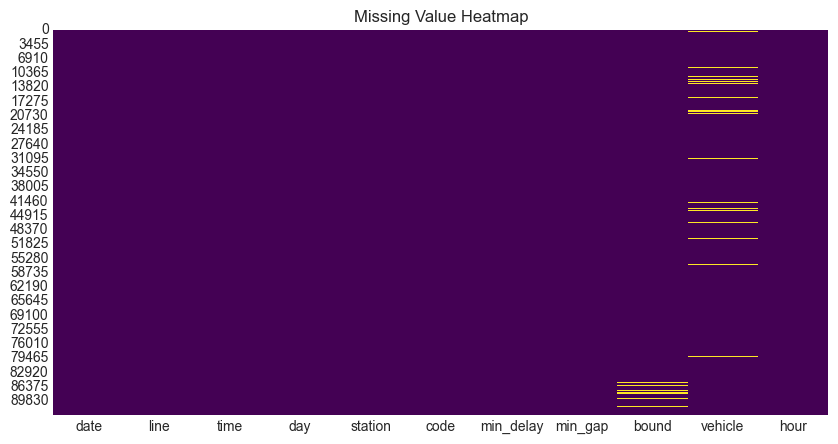

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt

# Check missing values
missing_summary = df.isna().sum()
print("Missing values per column:\n", missing_summary[missing_summary > 0])

plt.figure(figsize=(10,5))
sns.heatmap(df.isnull(), cbar=False, cmap="viridis")
plt.title("Missing Value Heatmap")
plt.show()


In [25]:
# Numeric columns : fill NaN with 0
num_cols = df.select_dtypes(include=["number"]).columns
df[num_cols] = df[num_cols].fillna(0)

# Categorical columns : fill NaN with 'Unknown'
cat_cols = df.select_dtypes(exclude=["number", "datetime"]).columns
df[cat_cols] = df[cat_cols].fillna("Unknown")

# Ensure valid datetime format
if "date" in df.columns:
    df["date"] = pd.to_datetime(df["date"], errors="coerce")

# Sort by date for temporal consistency
df = df.sort_values("date")



In [26]:
#Check missing values after data Imputation
df.isna().sum()


date         0
line         0
time         0
day          0
station      0
code         0
min_delay    0
min_gap      0
bound        0
vehicle      0
hour         0
dtype: int64

In [28]:
# Save final cleaned dataset
output_file = "Cleaned_TTC_Streetcar_Delays_2014_2025.csv"
df.to_csv(output_file, index=False)
print(f"leaned dataset saved successfully to: {output_file}")
print(f"Final Shape → Rows: {df.shape[0]} | Columns: {df.shape[1]}")


leaned dataset saved successfully to: Cleaned_TTC_Streetcar_Delays_2014_2025.csv
Final Shape → Rows: 93274 | Columns: 11


In [70]:
# Get unique values from the 'code (incident)' column
print(df['code'].unique())

['Late Leaving Garage' 'Utilized Off Route' 'Held By' 'Investigation'
 'Mechanical' 'General Delay' 'Emergency Services' 'Diversion'
 'Overhead - Pantograph' 'MTUI' 'TTSW' 'MTSAN' 'MTAFR' 'STO' 'MTUIR' 'MTO'
 'MTNOA' 'TFCNO' 'ETVC' 'MTVIS' 'MTIE' 'STDP' 'MFSAN' 'MTGD' 'MFTO' 'MFUI'
 'MTDV' 'SFAP' 'ETRA' 'TTPD' 'EFO' 'TTO' 'SFDP' 'TTOI' 'ETPI' 'SFO' 'MTUS'
 'ETDB' 'TTUS' 'PTOV' 'MFSH' 'MTTP' 'MTPU' 'STAP' 'TFO' 'TFPD' 'ETDO'
 'MTESA' 'ETSA' 'MTTO' 'MFUIR' 'PTNTF' 'ETHV' 'ETAC' 'TTPI' 'EFD' 'TFOI'
 'PTO' 'STAE' 'MTPOL' 'MTPI' 'ETWS' 'MFDV' 'MFPI' 'MFVIS' 'MFO' 'MUO'
 'ETBO' 'ETCE' 'ETTR' 'MTWEA' 'ETWA' 'PTW' 'MFWEA' 'MTPR' 'ETSE' 'ETLT'
 'MFUS' 'NTGD' 'PTSW' 'ETCM' 'MTS' 'MUWEA' 'ETVE' 'ETNT' 'ETO' 'ETFA'
 'PTSE' 'XXXXX' 'SFPOL' 'MFPR' 'ETCO' 'TFPI' 'ETLV' 'ETAX' 'TTSUP' 'STSA'
 'SUDP' 'ETTM' 'ETTB' 'PTPD' 'MFS' 'MTTD' 'EFHVA' 'SFAE' 'EFRA' 'SUPOL'
 'SUO' 'MTEC' 'MUIS' 'TTLL' 'MFESA' 'STSP']


In [71]:
# Split into descriptive vs TTC short codes
descriptive_codes = [c for c in df['code'].unique() if not c.isupper()]
short_codes = [c for c in df['code'].unique() if c.isupper() and len(c) <= 6]

print("Descriptive codes:\n", descriptive_codes)
print("\nShort TTC codes:\n", short_codes)


Descriptive codes:
 ['Late Leaving Garage', 'Utilized Off Route', 'Held By', 'Investigation', 'Mechanical', 'General Delay', 'Emergency Services', 'Diversion', 'Overhead - Pantograph']

Short TTC codes:
 ['MTUI', 'TTSW', 'MTSAN', 'MTAFR', 'STO', 'MTUIR', 'MTO', 'MTNOA', 'TFCNO', 'ETVC', 'MTVIS', 'MTIE', 'STDP', 'MFSAN', 'MTGD', 'MFTO', 'MFUI', 'MTDV', 'SFAP', 'ETRA', 'TTPD', 'EFO', 'TTO', 'SFDP', 'TTOI', 'ETPI', 'SFO', 'MTUS', 'ETDB', 'TTUS', 'PTOV', 'MFSH', 'MTTP', 'MTPU', 'STAP', 'TFO', 'TFPD', 'ETDO', 'MTESA', 'ETSA', 'MTTO', 'MFUIR', 'PTNTF', 'ETHV', 'ETAC', 'TTPI', 'EFD', 'TFOI', 'PTO', 'STAE', 'MTPOL', 'MTPI', 'ETWS', 'MFDV', 'MFPI', 'MFVIS', 'MFO', 'MUO', 'ETBO', 'ETCE', 'ETTR', 'MTWEA', 'ETWA', 'PTW', 'MFWEA', 'MTPR', 'ETSE', 'ETLT', 'MFUS', 'NTGD', 'PTSW', 'ETCM', 'MTS', 'MUWEA', 'ETVE', 'ETNT', 'ETO', 'ETFA', 'PTSE', 'XXXXX', 'SFPOL', 'MFPR', 'ETCO', 'TFPI', 'ETLV', 'ETAX', 'TTSUP', 'STSA', 'SUDP', 'ETTM', 'ETTB', 'PTPD', 'MFS', 'MTTD', 'EFHVA', 'SFAE', 'EFRA', 'SUPOL', 'SUO'

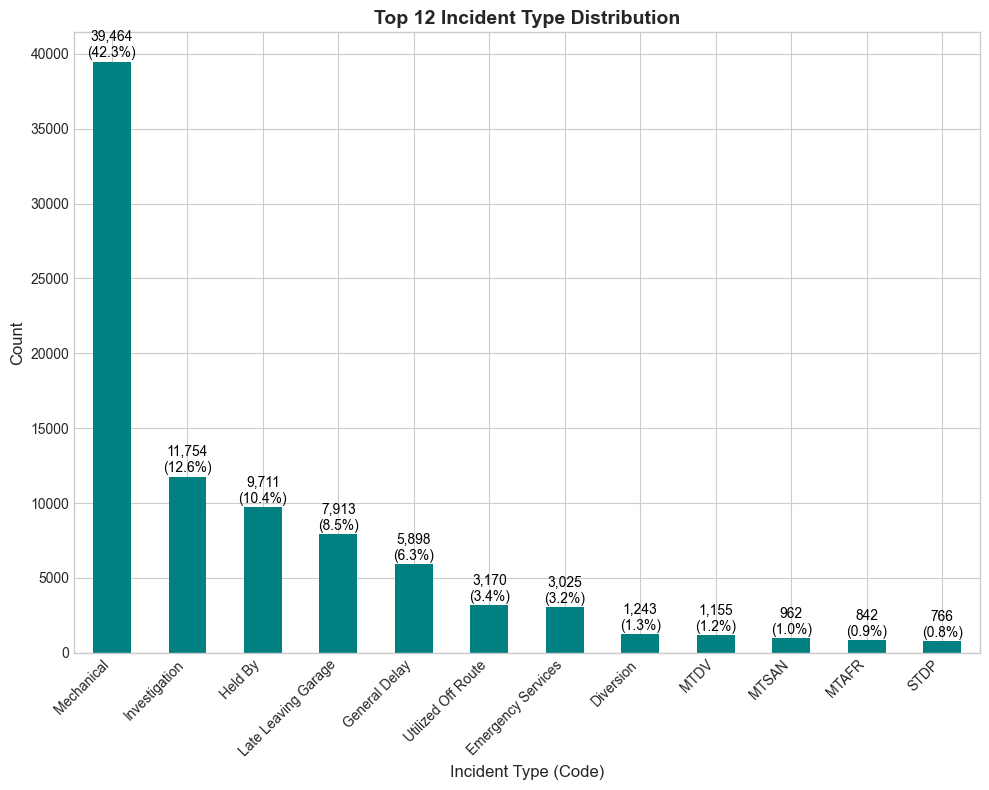

In [88]:
# Incident Type Distribution:Count and Percentage of Total Entries
import matplotlib.pyplot as plt

# Compute counts and percentages
code_counts = df['code'].value_counts().head(12)
total = len(df)
code_perc = (code_counts / total * 100).round(1)

# Plot
plt.figure(figsize=(10, 8))
ax = code_counts.plot(kind='bar', color='teal')

plt.title("Top 12 Incident Type Distribution", fontsize=14, weight='bold')
plt.xlabel("Incident Type (Code)", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.xticks(rotation=45, ha='right')

# Annotate each bar with count + percentage (vertically stacked)
for i, v in enumerate(code_counts):
    pct = code_perc.iloc[i]
    plt.text(i, v + total * 0.001, f"{v:,}\n({pct}%)",  # newline separates count & %
             ha='center', va='bottom', fontsize=10, color='black')

plt.tight_layout()
plt.show()


### The majority of incidents are dominated by mechanical and operational categories, reflecting that system or equipment issues are the main sources of delay. Less frequent categories like security or collision are rare but can cause severe disruptions.

C:\Users\amans\AppData\Local\Temp\ipykernel_3096\2711754878.py:6: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['hour'] = pd.to_datetime(df['time'], errors='coerce').dt.hour


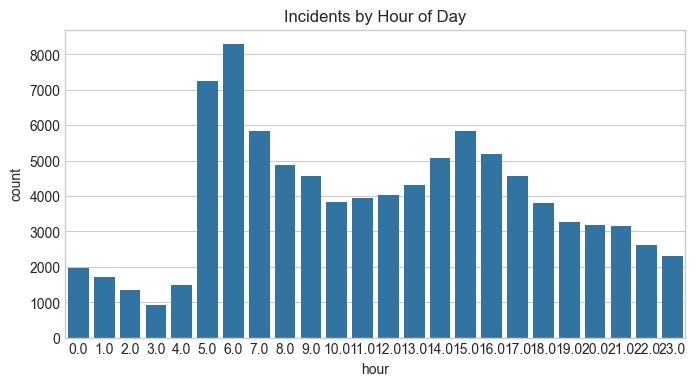

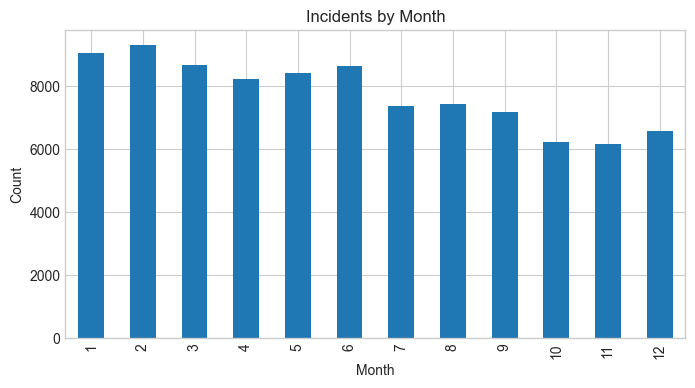

In [66]:
# Time-related Patterns

df['date'] = pd.to_datetime(df['date'], errors='coerce')
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['hour'] = pd.to_datetime(df['time'], errors='coerce').dt.hour

plt.figure(figsize=(8,4))
sns.countplot(x='hour', data=df)
plt.title("Incidents by Hour of Day")
plt.show()

plt.figure(figsize=(8,4))
df['month'].value_counts(sort=False).plot(kind='bar')
plt.title("Incidents by Month")
plt.xlabel("Month")
plt.ylabel("Count")
plt.show()


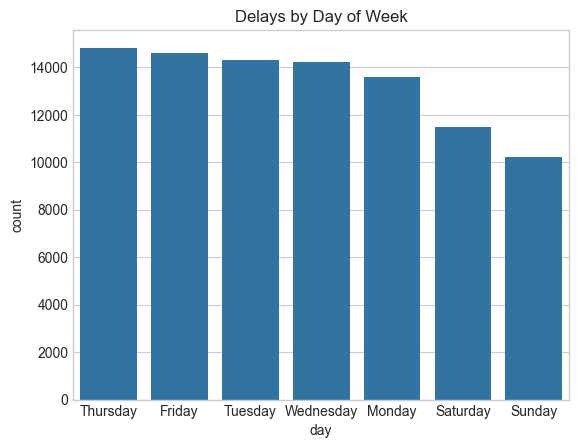

In [59]:
sns.countplot(data=df, x="day", order=df["day"].value_counts().index)
plt.title("Delays by Day of Week")
plt.show()



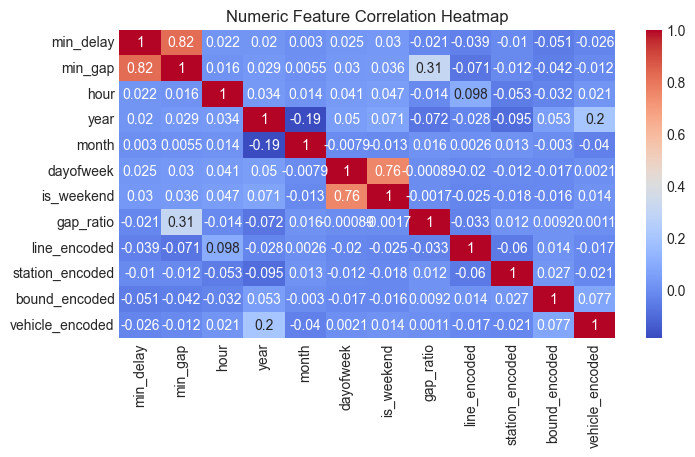

In [68]:
# Correlation Heatmap
num_cols = df.select_dtypes(include=[np.number]).columns
plt.figure(figsize=(8,4))
corr = df[num_cols].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Numeric Feature Correlation Heatmap")
plt.show()


### Strong correlation is observed between min_delay and min_gap, indicating that spacing issues between vehicles often result in longer delays. Most other variables are weakly correlated, justifying categorical encoding.

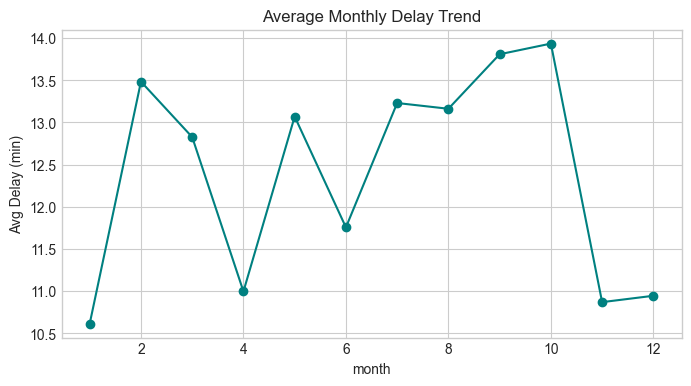

In [63]:

#Temporal Trends
# Time-based grouping (great for transport data):

df["date"] = pd.to_datetime(df["date"], errors="coerce")
df["month"] = df["date"].dt.month
df.groupby("month")["min_delay"].mean().plot(kind="line", figsize=(8,4), marker="o", color="teal")
plt.title("Average Monthly Delay Trend")
plt.ylabel("Avg Delay (min)")
plt.show()


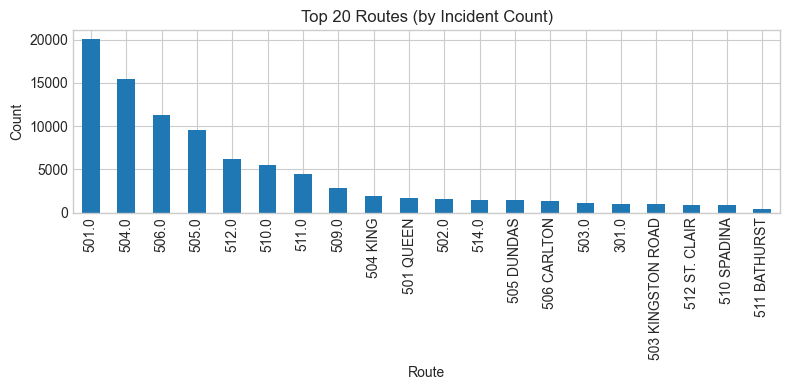

In [69]:
# Route Patterns
plt.figure(figsize=(8,4))
df['line'].value_counts().head(20).plot(kind='bar')
plt.title("Top 20 Routes (by Incident Count)")
plt.xlabel("Route")
plt.ylabel("Count")
plt.tight_layout()
plt.show()





### Certain routes, like 501 and 504, show significantly higher incident frequencies, likely due to route length and traffic exposure. These routes may benefit from predictive incident monitoring.

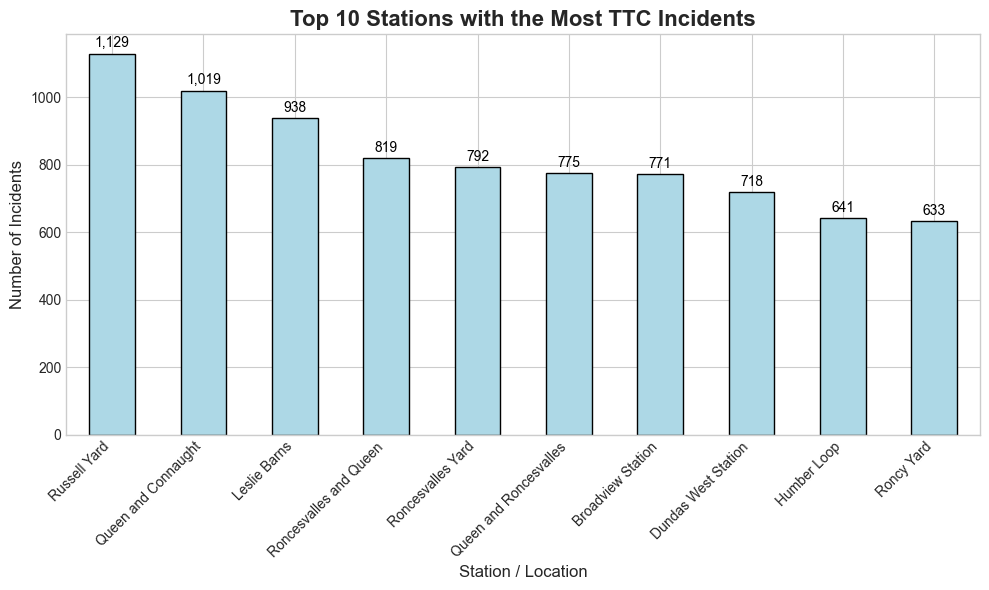

In [83]:
#Top 10 Stations with the Most Incidents
top_stations = df['station'].value_counts().head(10)

plt.figure(figsize=(10, 6))
ax = top_stations.plot(kind='bar', color='lightblue', edgecolor='black')

plt.title('Top 10 Stations with the Most TTC Incidents', fontsize=16, weight='bold')
plt.ylabel('Number of Incidents', fontsize=12)
plt.xlabel('Station / Location', fontsize=12)
plt.xticks(rotation=45, ha='right')

# Add count labels on top of bars
for i, v in enumerate(top_stations):
    plt.text(i, v + 10, f"{v:,}", ha='center', va='bottom', fontsize=10, color='black')

plt.tight_layout()
plt.show()


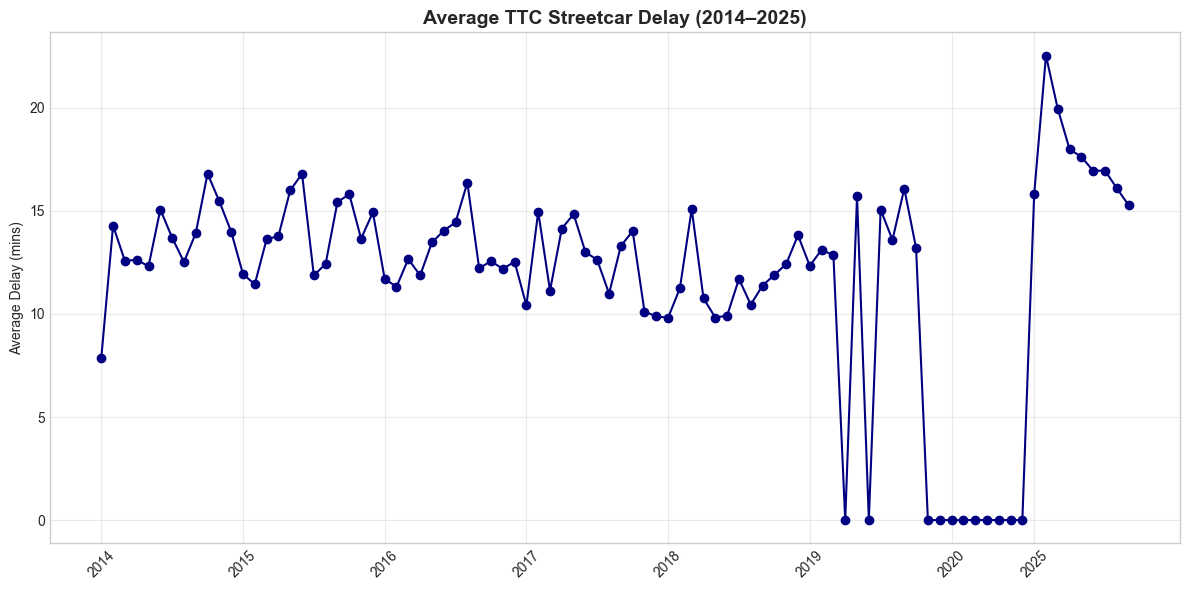

In [85]:
df['date'] = pd.to_datetime(df['date'], errors='coerce')
df['year_month'] = df['date'].dt.to_period('M')
monthly_delay = df.groupby('year_month')['min_delay'].mean()

plt.figure(figsize=(12,6))
plt.plot(monthly_delay.index.astype(str), monthly_delay.values, 'o-', color='navy')
plt.title("Average TTC Streetcar Delay (2014–2025)", fontsize=14, weight='bold')
plt.ylabel("Average Delay (mins)")

# Show yearly ticks
years = sorted(df['date'].dt.year.dropna().unique())
plt.xticks([f"{y}-01" for y in years], years, rotation=45)

plt.grid(alpha=0.4)
plt.tight_layout()
plt.show()



### The line shows a cyclical trend, with slight increases during winter months (likely due to weather-related slowdowns). A general upward pattern after 2020 suggests increasing service strain post-pandemic. Most streetcar delays are short (under 10 minutes), but a few long-tail cases exceed 30 minutes, indicating occasional severe incidents. This skew justifies transforming or binning delay durations for modeling.

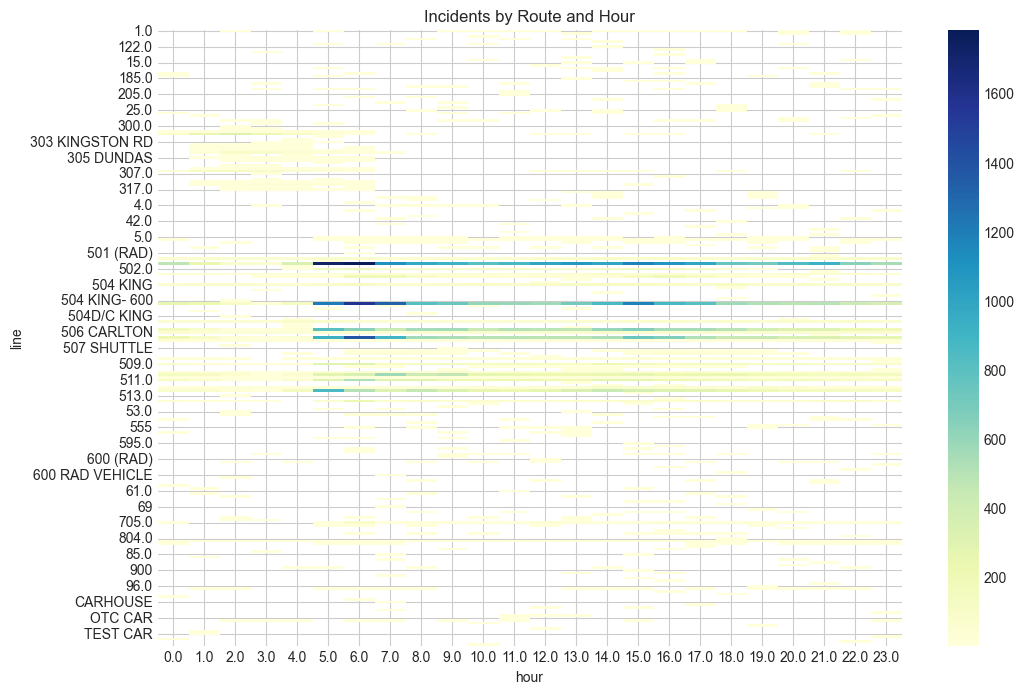

In [91]:
# Route-Time Pivot Heatmap
route_time = pd.pivot_table(df, index='line', columns='hour', values='code', aggfunc='count')
plt.figure(figsize=(12,8))
sns.heatmap(route_time, cmap='YlGnBu')
plt.title("Incidents by Route and Hour")
plt.show()


### Delay frequency peaks during rush hours (7–9 AM and 4–6 PM), consistent with traffic congestion and higher ridership. Modeling should include time-of-day features to capture these operational patterns.

## Feature Engineering


In [65]:
import pandas as pd
import numpy as np

# Load your cleaned dataset
df = pd.read_csv("Cleaned_TTC_Streetcar_Delays_2014_2025.csv")

# Time-Based Features:
df["date"] = pd.to_datetime(df["date"], errors="coerce")
df["year"] = df["date"].dt.year
df["month"] = df["date"].dt.month
df["dayofweek"] = df["date"].dt.dayofweek
df["hour"] = pd.to_datetime(df["time"], errors="coerce").dt.hour
df["is_weekend"] = df["dayofweek"].isin([5, 6]).astype(int)
df["season"] = df["month"].map({12:"Winter",1:"Winter",2:"Winter",
                                3:"Spring",4:"Spring",5:"Spring",
                                6:"Summer",7:"Summer",8:"Summer",
                                9:"Fall",10:"Fall",11:"Fall"})

# Delay-Related Features:
df["delay_bin"] = pd.cut(df["min_delay"],
                         bins=[-1,5,15,30,df["min_delay"].max()],
                         labels=["Low","Medium","High","Severe"])

df["gap_ratio"] = df["min_gap"] / (df["min_delay"] + 1)

# Categorical Encoding:
for col in ["line", "station", "bound", "vehicle"]:
    if col in df.columns:
        df[col] = df[col].astype(str).str.strip().replace("nan", np.nan)
        df[f"{col}_encoded"] = df[col].astype("category").cat.codes

# Interaction Features
df["route_time_combo"] = df["line"].astype(str) + "_" + df["hour"].astype(str)
df["station_day_combo"] = df["station"].astype(str) + "_" + df["dayofweek"].astype(str)

# Final Dataset for Modeling:
target = "code"
features = [c for c in df.columns if c not in [target, "date", "time"]]

df_model = df[features + [target]].dropna(subset=[target])

# Export for Model Team ---
df_model.to_csv("TTC_Feature_Engineered_2014_2025.csv", index=False)
print(f"Feature-engineered dataset saved. Rows: {df_model.shape[0]}, Columns: {df_model.shape[1]}")


C:\Users\amans\AppData\Local\Temp\ipykernel_3096\2942317582.py:5: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("Cleaned_TTC_Streetcar_Delays_2014_2025.csv")
C:\Users\amans\AppData\Local\Temp\ipykernel_3096\2942317582.py:12: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["hour"] = pd.to_datetime(df["time"], errors="coerce").dt.hour


Feature-engineered dataset saved. Rows: 93274, Columns: 22
